In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay



In [6]:
df = pd.read_csv("C:/Users/test/Downloads/diabetes_data_upload.csv")

In [7]:
print(df.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [8]:
print(df.head())

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [9]:
# Preprocess the data
yes_no_columns = df.select_dtypes(include=['object']).apply(lambda x: x.isin(['Yes', 'No']).all()).index
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print(df.head())


   Age  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0   40         0           1                   0         1           0   
1   58         0           0                   0         1           0   
2   41         1           0                   0         1           1   
3   45         0           0                   1         1           1   
4   60         1           1                   1         1           1   

   Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial paresis  muscle stiffness  Alopecia  Obesity  Gender_Male  \
0             

In [10]:
# Target Variable
X = df.drop('class_Positive', axis=1) 
y = df['class_Positive']             

In [11]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [12]:
correlation_matrix = df.corr()


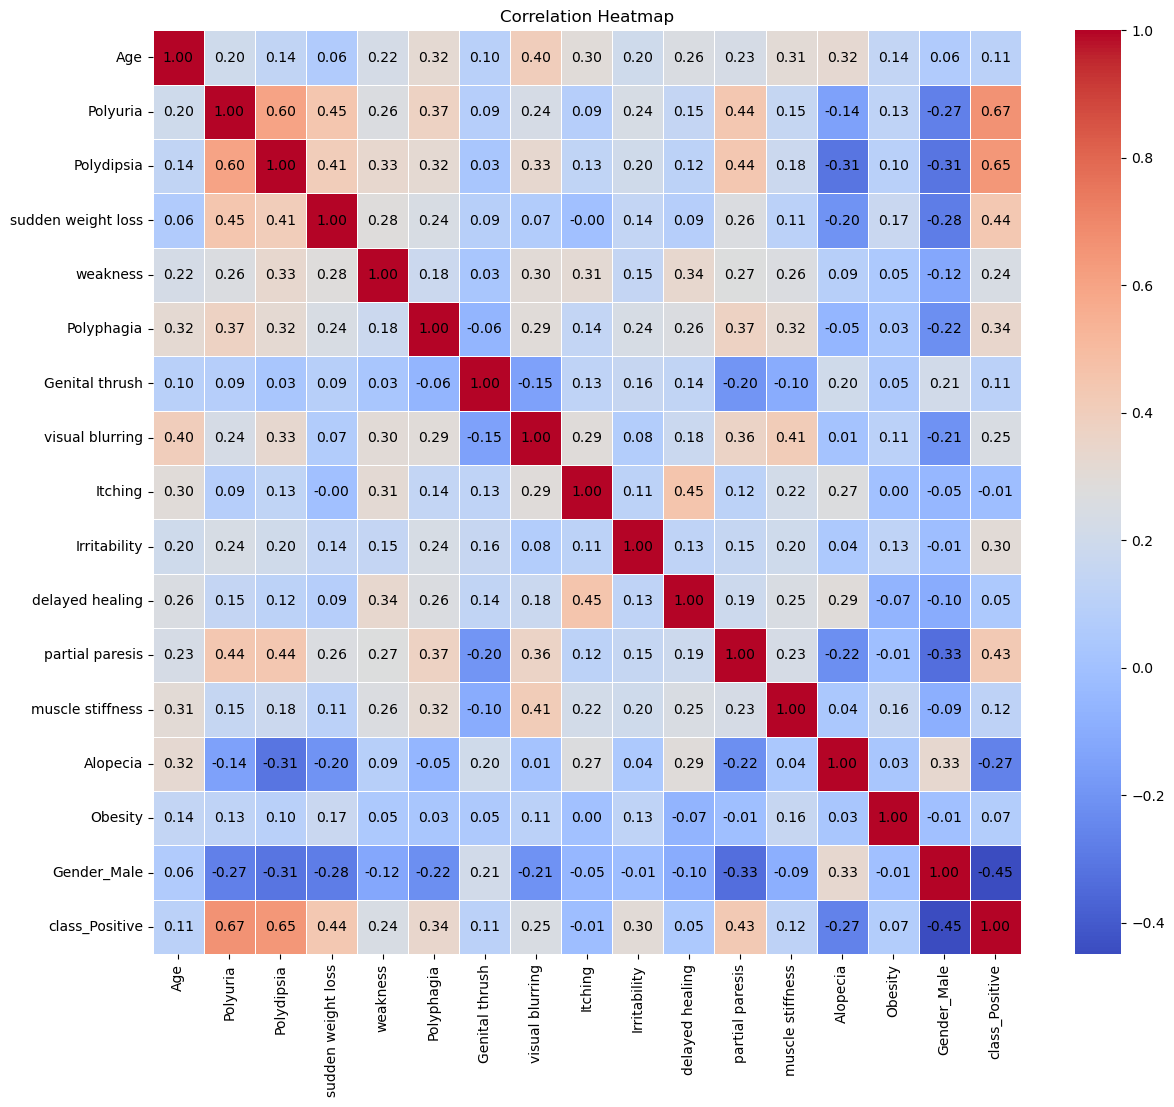

In [13]:
# Plotting the correlation heatmap without annotations
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', 
                 ha='center', va='center', color='black', fontsize=10)

plt.show()


Distribution of the target variable:


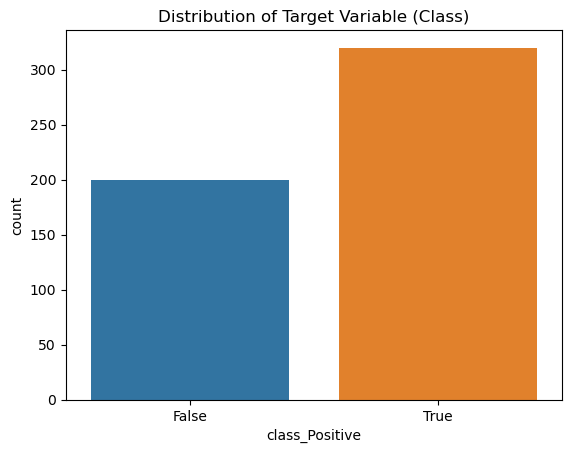

In [14]:
# Distribution of the target variable
print("\nDistribution of the target variable:")
sns.countplot(x='class_Positive', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.show()

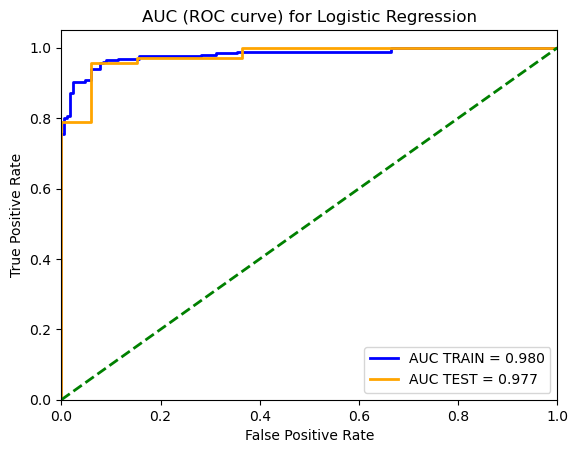

In [15]:
from sklearn.metrics import roc_curve, auc
# Plot ROC curve for Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


# Predicting probabilities
y_train_prob = log_reg.predict_proba(X_train)[:, 1]
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

# ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train:.3f}')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

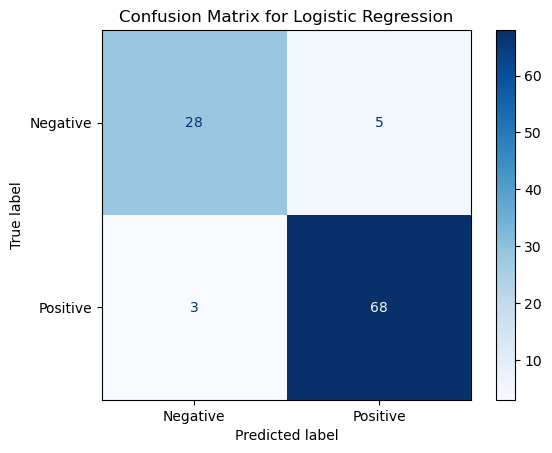

In [16]:
# Creating DataFrame for Confusion Matrix
y_pred_log_reg = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
# Logistic Regression
log_reg_report = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Classification Report:")
print(log_reg_report)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.85      0.88        33
        True       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



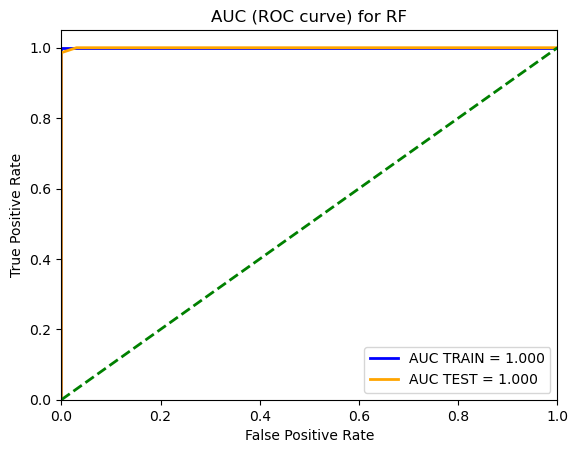

In [18]:
# Plot ROC curve for Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Predicting probabilities
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_prob = rf.predict_proba(X_test)[:, 1]

# ROC curve and ROC area for both training and test data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train:.3f}')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for RF')
plt.legend(loc='lower right')
plt.show()


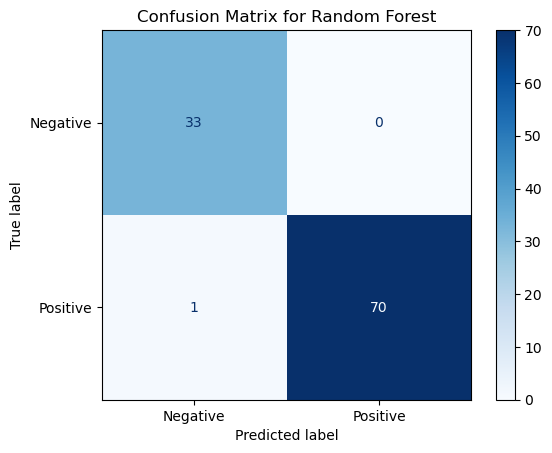

In [19]:
y_pred_rf = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [20]:
# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        33
        True       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



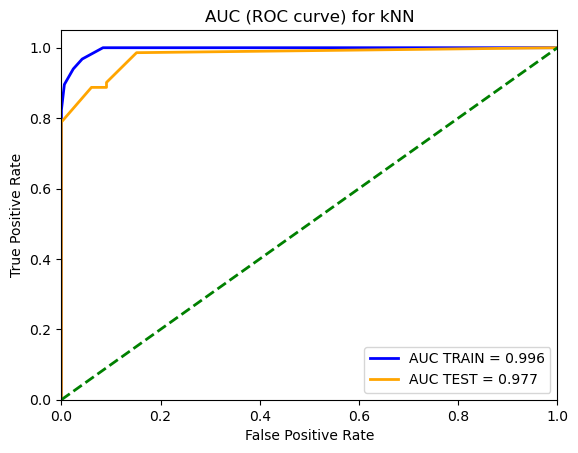

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting probabilities
y_train_prob = knn.predict_proba(X_train)[:, 1]
y_test_prob = knn.predict_proba(X_test)[:, 1]

# ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'AUC TRAIN = {roc_auc_train:.3f}')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'AUC TEST = {roc_auc_test:.3f}')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC curve) for kNN')
plt.legend(loc='lower right')
plt.show()

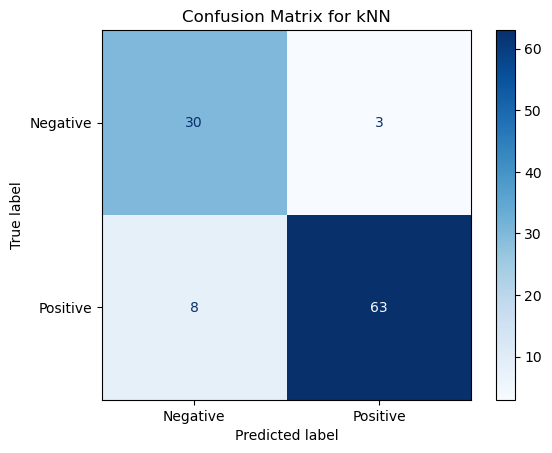

In [22]:
# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred_knn)
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for kNN')
plt.show()

In [23]:
#k-NN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))


k-NN Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.91      0.85        33
        True       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104



In [24]:
 from IPython.display import display, HTML
# Predicted probabilities
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

#Evaluation Metrics
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'kNN'],
    'Accuracy (%)': [
        accuracy_score(y_test, y_pred_log_reg) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_knn) * 100
    ],
    'Precision (%)': [
        precision_score(y_test, y_pred_log_reg) * 100,
        precision_score(y_test, y_pred_rf) * 100,
        precision_score(y_test, y_pred_knn) * 100
    ],
    'Recall (%)': [
        recall_score(y_test, y_pred_log_reg) * 100,
        recall_score(y_test, y_pred_rf) * 100,
        recall_score(y_test, y_pred_knn) * 100
    ],
    'F1 Score (%)': [
        f1_score(y_test, y_pred_log_reg) * 100,
        f1_score(y_test, y_pred_rf) * 100,
        f1_score(y_test, y_pred_knn) * 100
    ],
    'ROC-AUC (%)': [
        roc_auc_score(y_test, y_pred_prob_log_reg) * 100,
        roc_auc_score(y_test, y_pred_prob_rf) * 100,
        roc_auc_score(y_test, y_pred_prob_knn) * 100
    ]
}
# Creating DataFrame for Metrics
metrics_df = pd.DataFrame(metrics)

# Display the Metrics in a table format
metrics_html = metrics_df.to_html(index=False)

display(HTML(f"""
    <h3>Model Comparison Table</h3>
    {metrics_html}
"""))

Model,Accuracy (%),Precision (%),Recall (%),F1 Score (%),ROC-AUC (%)
Logistic Regression,92.307692,93.150685,95.774648,94.444444,97.737943
Random Forest,99.038462,100.000000,98.591549,99.290780,99.978660
kNN,89.423077,95.454545,88.732394,91.970803,97.737943


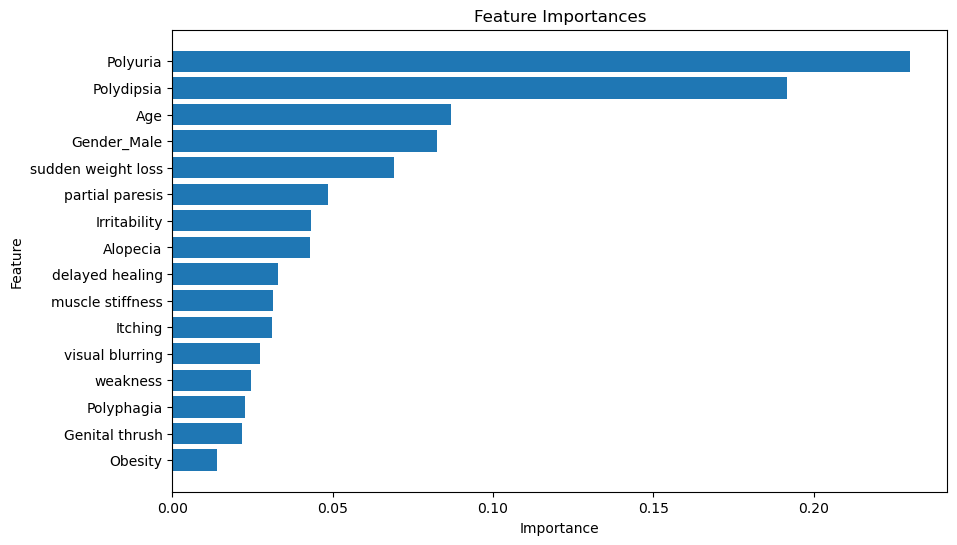

In [25]:
# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()